In [63]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

In [121]:
df = pd.read_csv("output.csv")
df.head()

,Speaker_ID,Sex,Chapter,Audio_Length,Tempo,Mean_F0,F0_Std
0,6241_M,0,6241-61943-0021.flac,2.520000,143.554688,153.000000,80.952007
1,8842_F,1,8842-302196-0008.flac,5.310023,107.666016,234.000000,2167.255984
2,6345_F,1,6345-93302-0025.flac,2.935011,80.749512,234.000000,2022.842849
3,6241_M,0,6241-61946-0009.flac,4.290023,143.554688,153.000000,1719.895568
4,6313_F,1,6313-66129-0011.flac,2.215011,117.453835,985.766755,891.777149


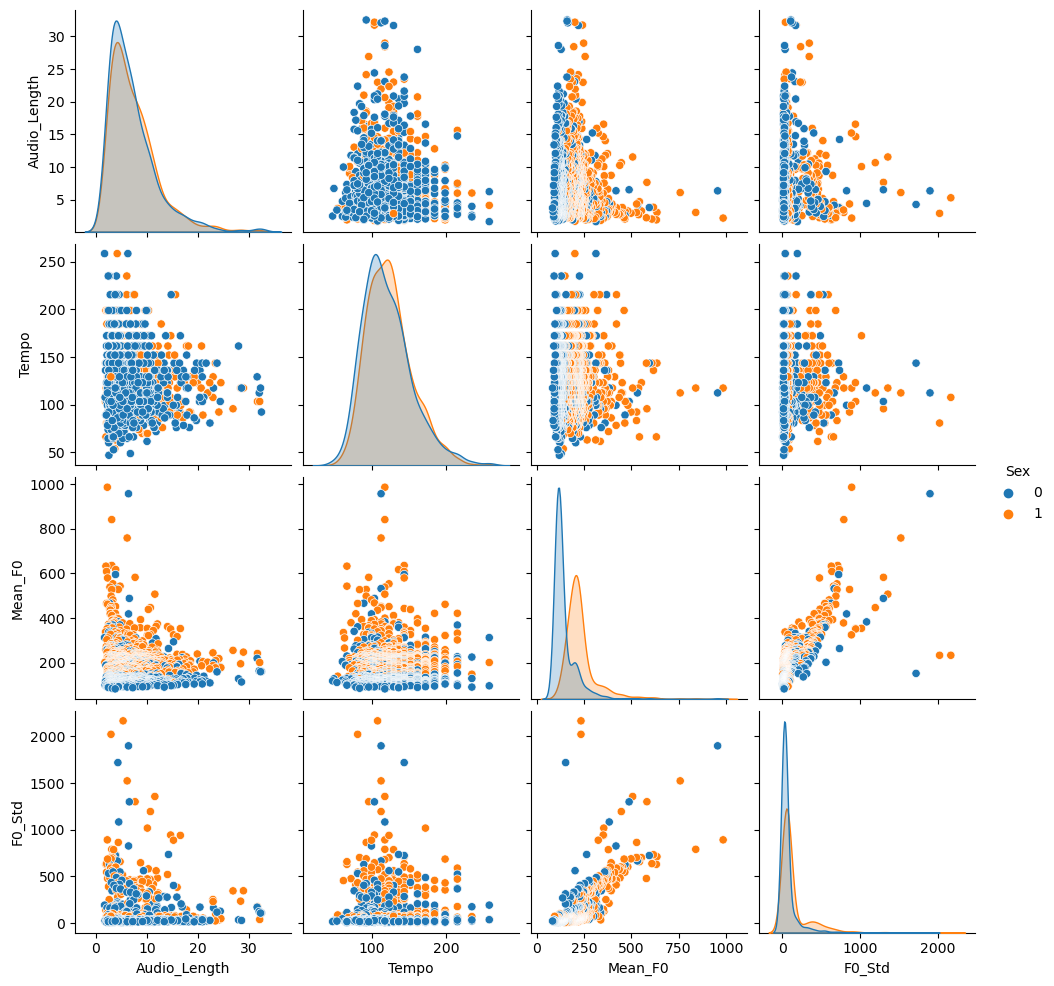

In [122]:
sns.pairplot(df,hue="Sex",height=2.5, diag_kind="kde")

C:\Users\DELL\AppData\Local\Temp\ipykernel_4452\2808308641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True)


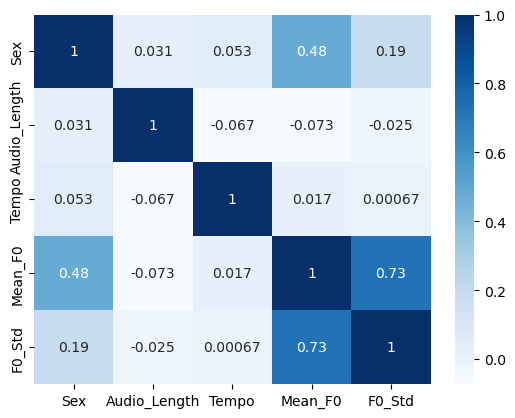

In [123]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

In [137]:
df_all=df.drop(columns=['Audio_Length']).copy()
print(df_all)
inp_df = df_all.drop(df_all.columns[[0,1,2]], axis=1)
inp_df
out_df = df_all.drop(df_all.columns[[0,2,3,4,5]], axis=1)
out_df

scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

     Speaker_ID  Sex                Chapter       Tempo     Mean_F0  \
0        6241_M    0   6241-61943-0021.flac  143.554688  153.000000   
1        8842_F    1  8842-302196-0008.flac  107.666016  234.000000   
2        6345_F    1   6345-93302-0025.flac   80.749512  234.000000   
3        6241_M    0   6241-61946-0009.flac  143.554688  153.000000   
4        6313_F    1   6313-66129-0011.flac  117.453835  985.766755   
...         ...  ...                    ...         ...         ...   
1332     6295_M    0  6295-244435-0008.flac  135.999178   91.618104   
1333     6295_M    0  6295-244435-0027.flac  161.499023   90.295040   
1334     3752_M    0    3752-4943-0002.flac  135.999178   88.899689   
1335     3752_M    0    3752-4944-0054.flac   83.354335   86.568804   
1336     3752_M    0    3752-4943-0008.flac  117.453835   83.751119   

           F0_Std  
0       80.952007  
1     2167.255984  
2     2022.842849  
3     1719.895568  
4      891.777149  
...           ...  
1332   

In [125]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.823199251637044
0.8208955223880597
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.83      0.83      0.83       142

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268

Confusion Matrix:
[[ 94  32]
 [  5 137]]


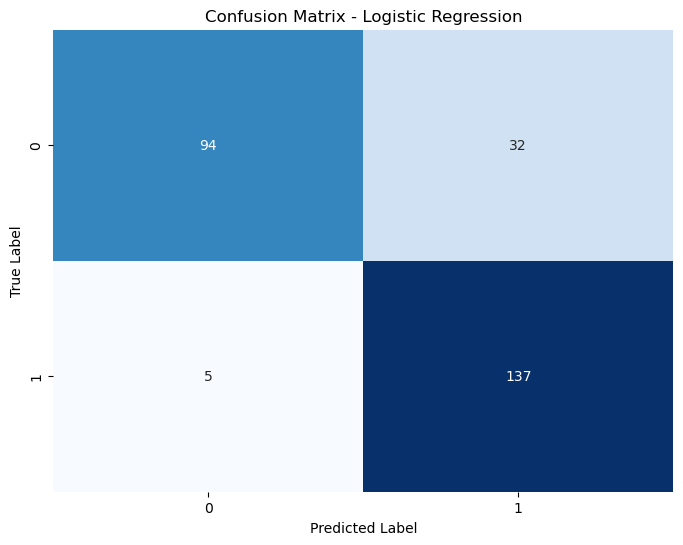

In [131]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=1500)
lr.fit(X_train, y_train)
train_score = accuracy_score(y_train, lr.predict(X_train))
print(train_score)
test_score = lr.score(X_test, y_test)
print(test_score)

print(classification_report(y_test, lr.predict(X_test)))
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_ts_arr, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [112]:
def model_predict(w, b, X, Y, learning_rate, n_iterations):
    costs = []
    for i in range(n_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #

        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))

    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

In [113]:
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.3,n_iterations=1500)

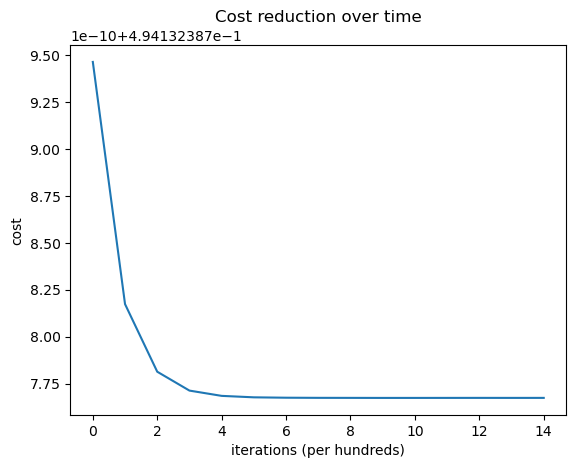

In [114]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [133]:
rf_classifier = RandomForestClassifier(n_estimators=110,max_features=3,random_state=0)
rf_classifier.fit(X_tr_arr, y_tr_arr)
y_pred = rf_classifier.predict(X_ts_arr)

# Calculate accuracy
accuracy = accuracy_score(y_ts_arr, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Calculate precision
precision = precision_score(y_ts_arr, y_pred)
print(f"Precision: {precision*100:.2f}%")

# Calculate recall
recall = recall_score(y_ts_arr, y_pred)
print(f"Recall: {recall*100:.2f}%")

# Calculate F1-score
f1 = f1_score(y_ts_arr, y_pred)
print(f"F1-score: {f1*100:.2f}%")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_ts_arr, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print(classification_report(y_test, lr.predict(X_test)))

D:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 87.31%
Precision: 84.62%
Recall: 92.96%
F1-score: 88.59%
Confusion Matrix:
[[102  24]
 [ 10 132]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.83      0.83      0.83       142

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Accuracy: 0.8656716417910447
MLP Classifier Loss: 0.32450406314482655
[[ 94  32]
 [  4 138]]


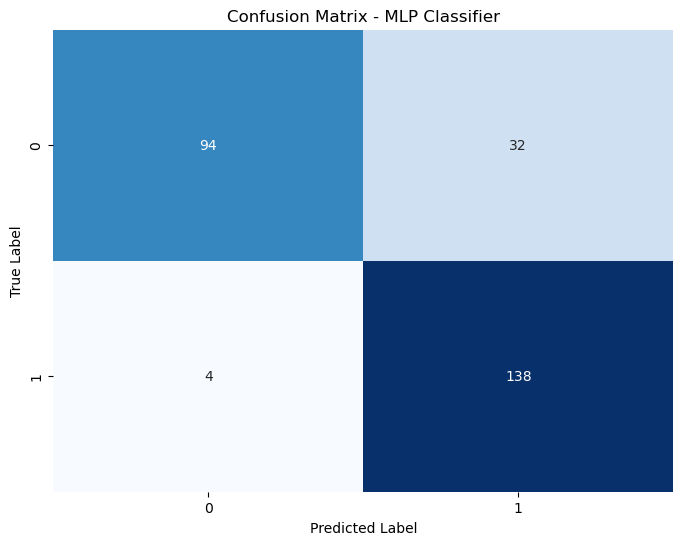

MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       126
           1       0.81      0.97      0.88       142

    accuracy                           0.87       268
   macro avg       0.89      0.86      0.86       268
weighted avg       0.88      0.87      0.86       268



In [138]:
# Fit MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_tr_arr, y_tr_arr)

# Evaluate MLPClassifier
mlp_val_accuracy = mlp_classifier.score(X_ts_arr, y_ts_arr)
print(f"MLP Classifier Accuracy: {mlp_val_accuracy}")

# Compute loss
mlp_loss = mlp_classifier.loss_
print(f"MLP Classifier Loss: {mlp_loss}")

# Predict classes for test set
y_pred = mlp_classifier.predict(X_ts_arr)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_ts_arr, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()

# Generate classification report
mlp_classification_report = classification_report(y_ts_arr, y_pred)
print("MLP Classifier Classification Report:")
print(mlp_classification_report)


In [67]:
!pip install --upgrade tensorflow keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata


In [140]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [141]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to extract spectrogram from audio file with fixed shape
def extract_spectrogram(audio_file, n_fft=2048, hop_length=512, n_mels=128, fixed_shape=(128, 128)):
    y, sr = librosa.load(audio_file)
    spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spec_db = librosa.power_to_db(spec, ref=np.max)
    # Pad or crop spectrogram to fixed shape
    if spec_db.shape[1] < fixed_shape[1]:
        spec_db = np.pad(spec_db, ((0, 0), (0, fixed_shape[1] - spec_db.shape[1])), mode='constant')
    elif spec_db.shape[1] > fixed_shape[1]:
        spec_db = spec_db[:, :fixed_shape[1]]
    return spec_db

# Load data and extract spectrograms with fixed shape
def load_data(parent_folder):
    X = []
    y = []
    for gender_folder in os.listdir(parent_folder):
        gender_path = os.path.join(parent_folder, gender_folder)
        if os.path.isdir(gender_path):
            for chapter_folder in os.listdir(gender_path):
                chapter_path = os.path.join(gender_path, chapter_folder)
                if os.path.isdir(chapter_path):
                    for audio_file in os.listdir(chapter_path):
                        if audio_file.endswith('.flac'):
                            audio_path = os.path.join(chapter_path, audio_file)
                            spec = extract_spectrogram(audio_path, fixed_shape=(128, 128))
                            X.append(spec)
                            y.append(gender_folder)
    return np.array(X), np.array(y)

# Load data and extract spectrograms with fixed shape
X, y = load_data(parent_folder)


In [142]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping

# Convert string labels to numeric format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape data to add channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train_encoded, batch_size=32, epochs=15, 
          validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/15
34/34 [==============================] - 18s 460ms/step - loss: 24.7020 - accuracy: 0.5738 - val_loss: 0.4105 - val_accuracy: 0.8657
Epoch 2/15
34/34 [==============================] - 14s 413ms/step - loss: 0.3588 - accuracy: 0.8579 - val_loss: 0.3100 - val_accuracy: 0.8918
Epoch 3/15
34/34 [==============================] - 13s 397ms/step - loss: 0.2941 - accuracy: 0.8944 - val_loss: 0.2938 - val_accuracy: 0.8843
Epoch 4/15
34/34 [==============================] - 12s 360ms/step - loss: 0.2268 - accuracy: 0.9103 - val_loss: 0.2201 - val_accuracy: 0.9067
Epoch 5/15
34/34 [==============================] - 13s 388ms/step - loss: 0.1831 - accuracy: 0.9234 - val_loss: 0.2311 - val_accuracy: 0.9030
Epoch 6/15
34/34 [==============================] - 12s 358ms/step - loss: 0.1366 - accuracy: 0.9449 - val_loss: 0.1781 - val_accuracy: 0.9328
Epoch 7/15
34/34 [==============================] - 12s 361ms/step - loss: 0.2163 - accuracy: 0.9299 - val_loss: 0.2892 - val_accuracy: 0.910

In [144]:
from sklearn.metrics import classification_report
# Predict probabilities for test set
y_pred_prob = model.predict(X_test)

# Apply threshold (e.g., 0.5) to convert probabilities to binary predictions
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype(int)

# Convert numeric labels back to original string labels
y_test = label_encoder.inverse_transform(y_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_binary)

# Generate classification report
print(classification_report(y_test, y_pred))


9/9 [==============================] - 1s 55ms/step
              precision    recall  f1-score   support

      Female       0.96      0.98      0.97       131
        Male       0.98      0.96      0.97       137

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
from sklearn.neural_network import MLPClassifier
# Reshape spectrograms to flatten them into 2D arrays
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Initialize and train MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_flattened, y_train_encoded)

# Evaluate MLPClassifier
mlp_val_accuracy = mlp_classifier.score(X_test_flattened, y_test_encoded)
print(f"MLP Classifier Accuracy: {mlp_val_accuracy}")
mlp_loss = mlp_classifier.loss_
print(f"MLP Classifier Loss: {mlp_loss}")

MLP Classifier Accuracy: 0.7611940298507462
MLP Classifier Loss: 0.7106414908994074


In [149]:
# Predict classes for test set
y_pred_mlp = mlp_classifier.predict(X_test_flattened)

# Generate classification report
mlp_classification_report = classification_report(y_test_encoded, y_pred_mlp)

# Print classification report
print(mlp_classification_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(con_matrix)

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       131
           1       0.68      1.00      0.81       137

    accuracy                           0.76       268
   macro avg       0.84      0.76      0.74       268
weighted avg       0.84      0.76      0.75       268



ValueError: Mix of label input types (string and number)